In [48]:
import pandas as pd
from matplotlib import pyplot as plt

In [73]:
# Load CVS
df = pd.read_csv('CDFCollections240508csv.csv')
# Display the first few rows
print(df.head())

   Kingdom         Family                              SciName  \
0  Plantae   Salviniaceae  Azolla filiculoides subsp. cristata   
1  Plantae   Boraginaceae              Tournefortia pubescens    
2  Plantae    Sapindaceae           Cardiospermum galapageium    
3  Plantae  Euphorbiaceae        Croton scouleri var. darwinii   
4  Plantae   Boraginaceae                      Tiquilia fusca    

   LatitudeDecimal  LongitudeDecimal CollectionCode   Origin  \
0        -0.616700        -90.350000            CDS   Native   
1        -0.496722        -90.358638            CDS  Endemic   
2        -0.396666        -90.290833            CDS  Endemic   
3         1.375000        -91.819400            CDS  Endemic   
4        -0.582327        -90.165816            CDS  Endemic   

             StartDate  
0  2003-04-20 00:00:00  
1  1963-02-10 00:00:00  
2  1963-02-10 00:00:00  
3  1963-02-16 00:00:00  
4  1963-02-20 00:00:00  


In [109]:
unique_collection_codes = df['CollectionCode'].unique()
print(unique_collection_codes)

['CDS' 'ICCDRS' 'VCCDRS' 'MCCDRS']


In [130]:
# Nuevo DataFrame
new_df = df.pivot_table(index='Family', columns='CollectionCode', aggfunc='size', fill_value=0)

# Mostrar el nuevo DataFrame
print(new_df)

CollectionCode     CDS  ICCDRS  MCCDRS  VCCDRS
Family                                        
Acanthaceae        255       0       0       0
Acanthochitonidae    0       0       8       0
Acanthuridae         0       0       1       0
Acarosporaceae      35       0       0       0
Acartiidae           0       0       1       0
...                ...     ...     ...     ...
Ziphiidae            0       0       0       3
Zonitidae            0       1       0       0
Zopheridae           0      16       0       0
Zoridae              0       6       0       0
Zygophyllaceae     108       0       0       0

[1028 rows x 4 columns]


In [131]:
# Proportions
proporciones_df = new_df.div(new_df.sum())
print(proporciones_df)

CollectionCode          CDS    ICCDRS    MCCDRS    VCCDRS
Family                                                   
Acanthaceae        0.007635  0.000000  0.000000  0.000000
Acanthochitonidae  0.000000  0.000000  0.001536  0.000000
Acanthuridae       0.000000  0.000000  0.000192  0.000000
Acarosporaceae     0.001048  0.000000  0.000000  0.000000
Acartiidae         0.000000  0.000000  0.000192  0.000000
...                     ...       ...       ...       ...
Ziphiidae          0.000000  0.000000  0.000000  0.001984
Zonitidae          0.000000  0.000041  0.000000  0.000000
Zopheridae         0.000000  0.000649  0.000000  0.000000
Zoridae            0.000000  0.000243  0.000000  0.000000
Zygophyllaceae     0.003234  0.000000  0.000000  0.000000

[1028 rows x 4 columns]


In [132]:
# Calcular las proporciones normalizadas
proporciones_df = new_df.div(new_df.sum(axis=0))

# Calcular la suma de cada columna
suma_columnas = proporciones_df.sum()

# Mostrar la suma de cada columna
print(suma_columnas)


CollectionCode
CDS       1.0
ICCDRS    1.0
MCCDRS    1.0
VCCDRS    1.0
dtype: float64


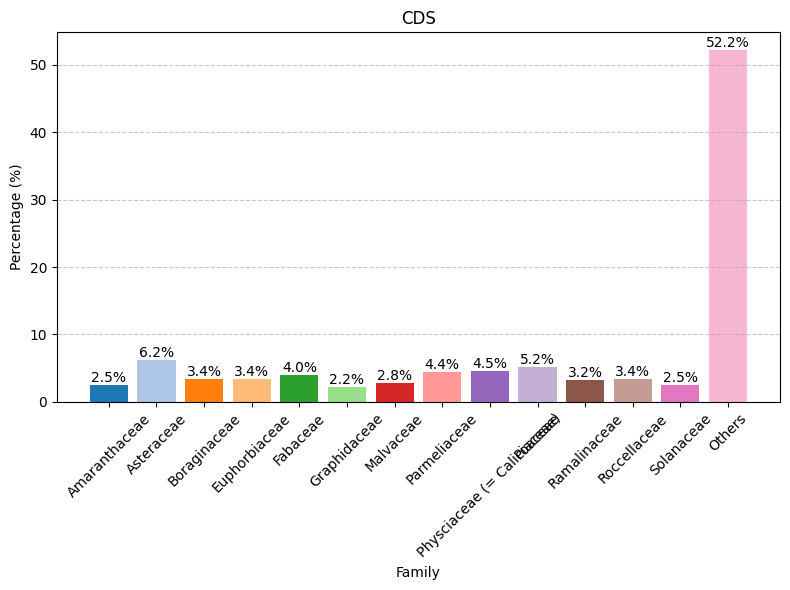

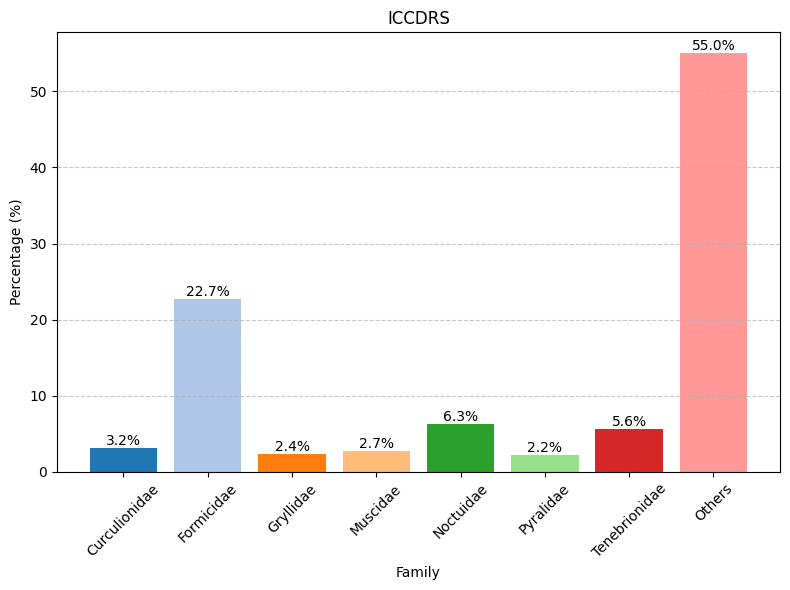

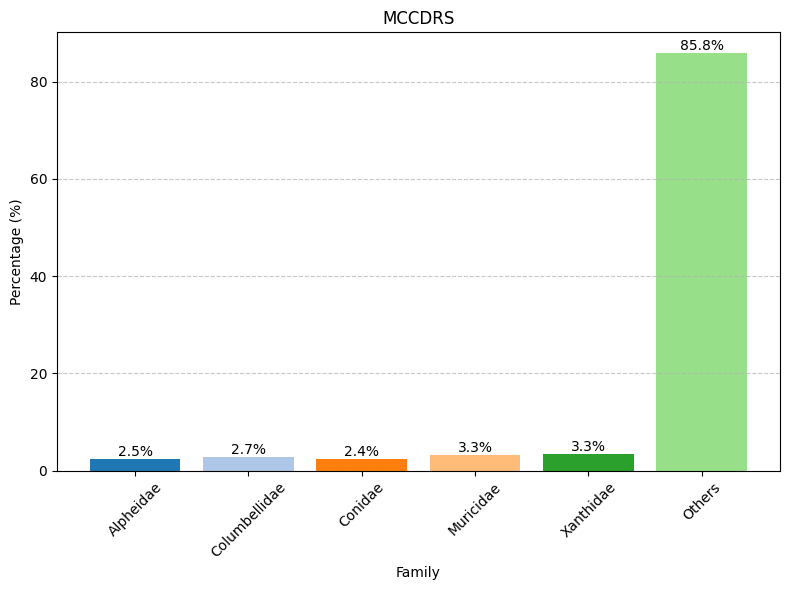

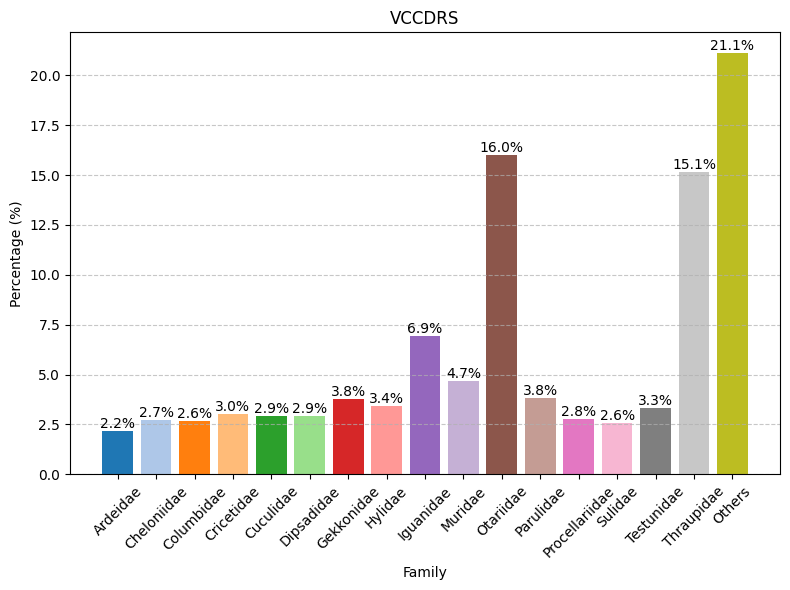

In [133]:
# Crear un gráfico para cada columna
for columna in proporciones_df.columns:
    # Obtener las proporciones para la columna actual
    proporciones = proporciones_df[columna]
    
    # Identificar los valores que están por debajo del umbral
    otros = proporciones[proporciones < umbral]
    
    # Sumar los valores inferiores al umbral para 'Others'
    otros_suma = otros.sum()
    
    # Filtrar las proporciones que superan el umbral
    proporciones = proporciones[proporciones >= umbral]
    
    # Agregar 'Others' con su valor
    if otros_suma > 0:
        proporciones['Others'] = otros_suma
    
    # Crear el gráfico de barras con colores diferentes y porcentajes en la parte superior
    plt.figure(figsize=(8, 6))
    bars = plt.bar(proporciones.index, proporciones * 100, color=plt.cm.tab20.colors[:len(proporciones)])
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')
    
    # Configurar el título y los ejes
    plt.title(f'{columna}')
    plt.xlabel('Family')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



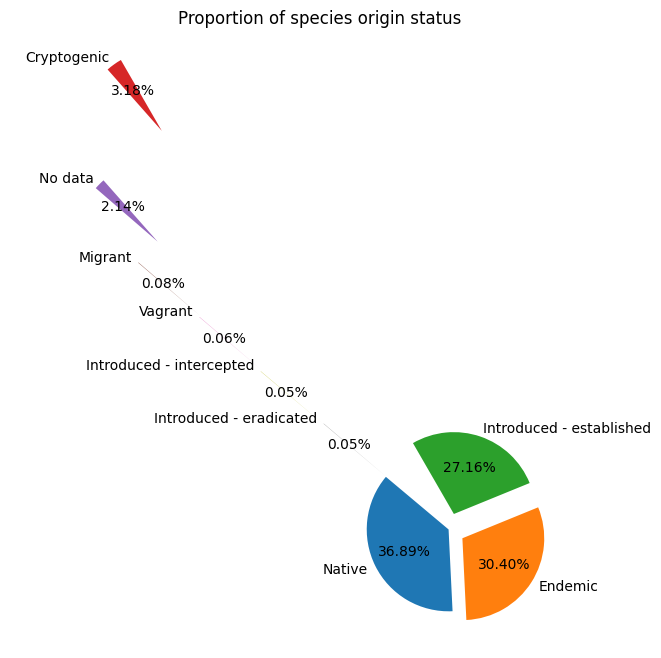

In [135]:
# Convert to DataFrame
proportions_o_df = pd.DataFrame(proportions_o)
proportions_o_df.columns = ['Percentage']

# Define explode
explode = [0,0.2,0.2,6,5,4,3,1,2]  # Explode only the second label, adjust as needed

# Plot
plt.figure(figsize=(8, 8))
plt.pie(proportions_o_df['Percentage'], labels=proportions_o_df.index, explode=explode, autopct='%2.2f%%', startangle=140)
plt.title('Proportion of species origin status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()